### <h1><center><font color='Blue'><b>Machine Learning Task<font></a>
### <section><center><font color='gray'>(Ezi-technologies)</a>
### <h2><center><font color='orange'>Spam Classification<font></a>



### <section><center><font color='gray'>By : Alishba Ghazanfar </a> 

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

## 2.Import data 

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## 3.Drop extra columns 

In [5]:
data=data.iloc[:,:2] # First shows all rows and second shows 2 columns 0 and 1.

In [6]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
print("Rows  Columns") 
print("_____________") 
data.shape

Rows  Columns
_____________


(5572, 2)

## 4.Data Preprocessing 

In [8]:
#checking null values
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
#checking duplicate values
data.duplicated().sum()

403

In [10]:
#drop duplicates except fist
data = data.drop_duplicates(keep='first')

In [11]:
data.shape

(5169, 2)

In [12]:
#encoding the target variables, ham:0 and spam:1

encoder = LabelEncoder()
data['v1']= encoder.fit_transform(data['v1'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_16308\1312655154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['v1']= encoder.fit_transform(data['v1'])


In [13]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 5.Feature Selection 

In [14]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=1000)

In [15]:
X = tfidf.fit_transform(data['v2']).toarray()

In [16]:
X.shape

(5169, 1000)

In [17]:
y = data['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

## 6.Spliting the data into test and train set 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

## 7.Models Training 

###  Gaussian Naive Bayes

In [19]:
#for Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8143133462282398
[[1059  272]
 [  16  204]]
0.42857142857142855


###  Multinomial Naive Bayes

In [20]:
#for Multinomial Naive Bayes

mnb = MultinomialNB()
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9793681495809156
[[1329    2]
 [  30  190]]
0.9895833333333334


###  Bernoulli Naive Bayes

In [21]:
#for Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9851708575112831
[[1324    7]
 [  16  204]]
0.966824644549763


In [22]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

## 8.K-fold cross Validation 

In [24]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(bnb,X,y,cv=10)

In [25]:
cv_score

array([0.99032882, 0.98839458, 0.98646035, 0.98259188, 0.98452611,
       0.98452611, 0.98259188, 0.98646035, 0.98646035, 0.98837209])

In [26]:
cv_score.mean()

0.9860712518555171

## 9.Predicting Messages 

In [29]:
# Predicting new messages
# Assuming you have already defined and fitted the vectorizer and bnb models

# Define new_messages
new_messages = ["Buy our product now!", "Hello, how are you?"]

# Transform new_messages using the vectorizer
new_messages_features = tfidf.transform(new_messages)

# Make predictions using the fitted model
predictions = bnb.predict(new_messages_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 0]


## 10.Confussion Matrix 

In [30]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred3)

print(cf_matrix)


[[1324    7]
 [  16  204]]


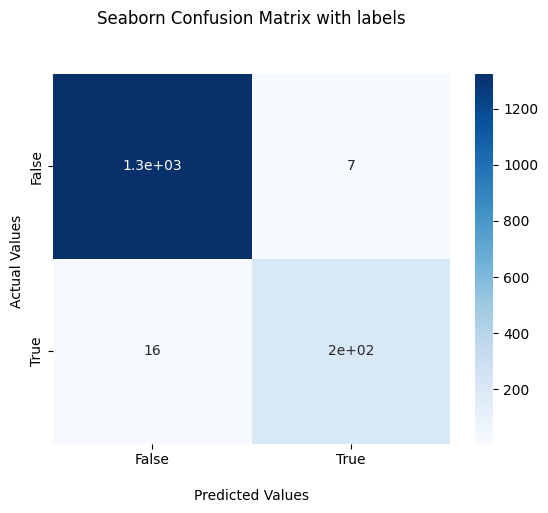

In [31]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## 11. Data Visualization

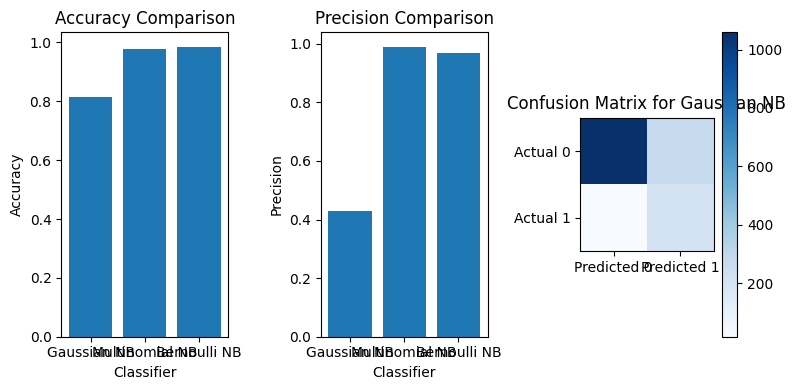

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# The accuracy, confusion matrix, and precision for each classifier
accuracy_scores = [accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)]
precision_scores = [precision_score(y_test, y_pred1), precision_score(y_test, y_pred2), precision_score(y_test, y_pred3)]
confusion_matrices = [confusion_matrix(y_test, y_pred1), confusion_matrix(y_test, y_pred2), confusion_matrix(y_test, y_pred3)]

# Labels for the classifiers
labels = ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']

# Plotting accuracy scores
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.bar(labels, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Plotting precision scores
plt.subplot(1, 3, 2)
plt.bar(labels, precision_scores)
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Precision Comparison')

# Plotting confusion matrices
plt.subplot(1, 3, 3)
plt.imshow(confusion_matrices[0], cmap='Blues')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Gaussian NB')
plt.colorbar()

plt.tight_layout()
plt.show()


### Comparing the models 

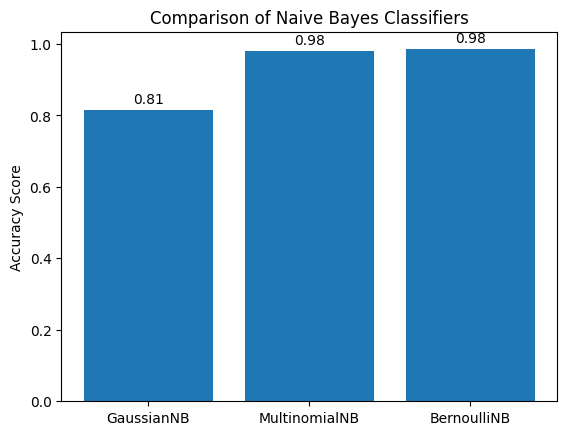

In [34]:
# accuracy scores for each classifier
gnb_score = 0.814
mnb_score = 0.979
bnb_score = 0.985

# Plotting the bar graph
labels = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
scores = [gnb_score, mnb_score, bnb_score]

x = range(len(labels))

fig, ax = plt.subplots()
rects = ax.bar(x, scores)

ax.set_ylabel('Accuracy Score')
ax.set_title('Comparison of Naive Bayes Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add data labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()


### This shows Bernoulli Naive Bayes and Multinomial Naive Bayes work's better than other Gaussian Navie Bayes models.